## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
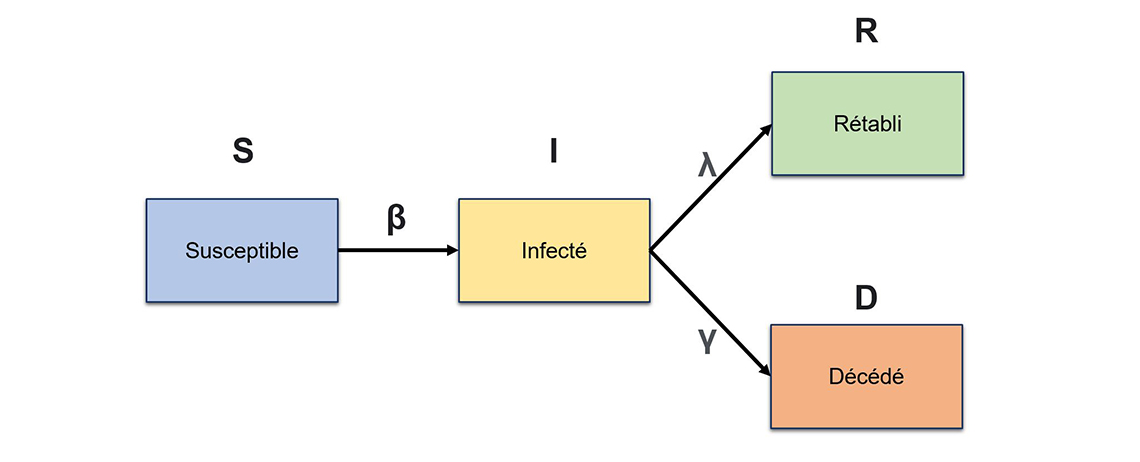


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [32]:
#0 et 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paramétres initiaux
beta  = 1/2 # Proba de transmition de la maladie
gamma = 1/2 # Proba de guérison/ immunisé
micro = 1/2 # Proba décés
time = 0
params = [beta, gamma, micro]
# Paramétres des équations

sus  = 1/2 # % de la population susseptible d'étre infectés à l'instant t
inf  = 1/2 # % de la population infectés à 'instant t
heal = 1/2 # % de la population (guéris/ immunisé) à l'instant t
dead = 1/2 # % de la population décédé à l'instant t

params_eq = [sus, inf, heal, dead]

step = 0.001
duration = 90 # Nombre en jours




### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [33]:
#1
def euler_sird(params, params_eq, step, duration):
    beta, gamma, micro = params
    sus, inf, heal, dead = params_eq

    sus = [sus]
    inf = [inf]
    heal = [heal]
    dead = [dead]
    time = [0]
    number_points = int(duration / step)

    for _ in range(1, number_points):
        new_time = time[-1] + step

        # Calcul des variations
        dsdt = - beta * sus[-1] * inf[-1] * step + sus[-1]
        didt = (beta * sus[-1] * inf[-1] - gamma * inf[-1] - micro * inf[-1]) * step + inf[-1]
        drdt = gamma * inf[-1] * step + heal[-1]
        dddt = micro * inf[-1] * step + dead[-1]

        # Mise à jour des listes
        time.append(new_time)
        sus.append( dsdt)
        inf.append(didt)
        heal.append( drdt)
        dead.append( dddt)

    # Décimation des listes
    time = time[::100]
    sus = sus[::100]
    inf = inf[::100]
    heal = heal[::100]
    dead = dead[::100]

    return time, sus, inf, heal, dead

In [34]:
time, sus, inf, heal, dead = euler_sird([0.5, 0.15, 0.0015],[0.99, 0.01, 0, 0],0.01, 90)


In [35]:
df = pd.read_csv('/content/sird_dataset.csv')

In [36]:
def ploting(time, sus, inf, heal, dead, df_time, df_sus, df_inf, df_heal, df_dead):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Create a 2x2 grid of subplots

    # Subplot 1: Susceptible
    axes[0, 0].plot(time, sus, label="Personnes SUS", color="red")
    axes[0, 0].plot(df_time, df_sus, label="Personnes SUS true", color="yellow")
    axes[0, 0].set_title("Susceptible")
    axes[0, 0].legend()

    # Subplot 2: Infected
    axes[0, 1].plot(time, inf, label="Personnes réellement infectées", color="blue")
    axes[0, 1].plot(df_time, df_inf, label="Personnes Infected true", color="green")
    axes[0, 1].set_title("Réellement infectés")
    axes[0, 1].legend()

    # Subplot 3: Recovered/Healed
    axes[1, 0].plot(time, heal, label="Personnes Rétablies", color="green")
    axes[1, 0].plot(df_time, df_heal, label="Personnes Healed true", color="orange")
    axes[1, 0].set_title("Rétablis/Immunisés")
    axes[1, 0].legend()

    # Subplot 4: Deceased
    axes[1, 1].plot(time, dead, label="Personnes Dead", color="black")
    axes[1, 1].plot(df_time, df_dead, label="Personnes mortes", color="purple")
    axes[1, 1].set_title("Décès")
    axes[1, 1].legend()

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

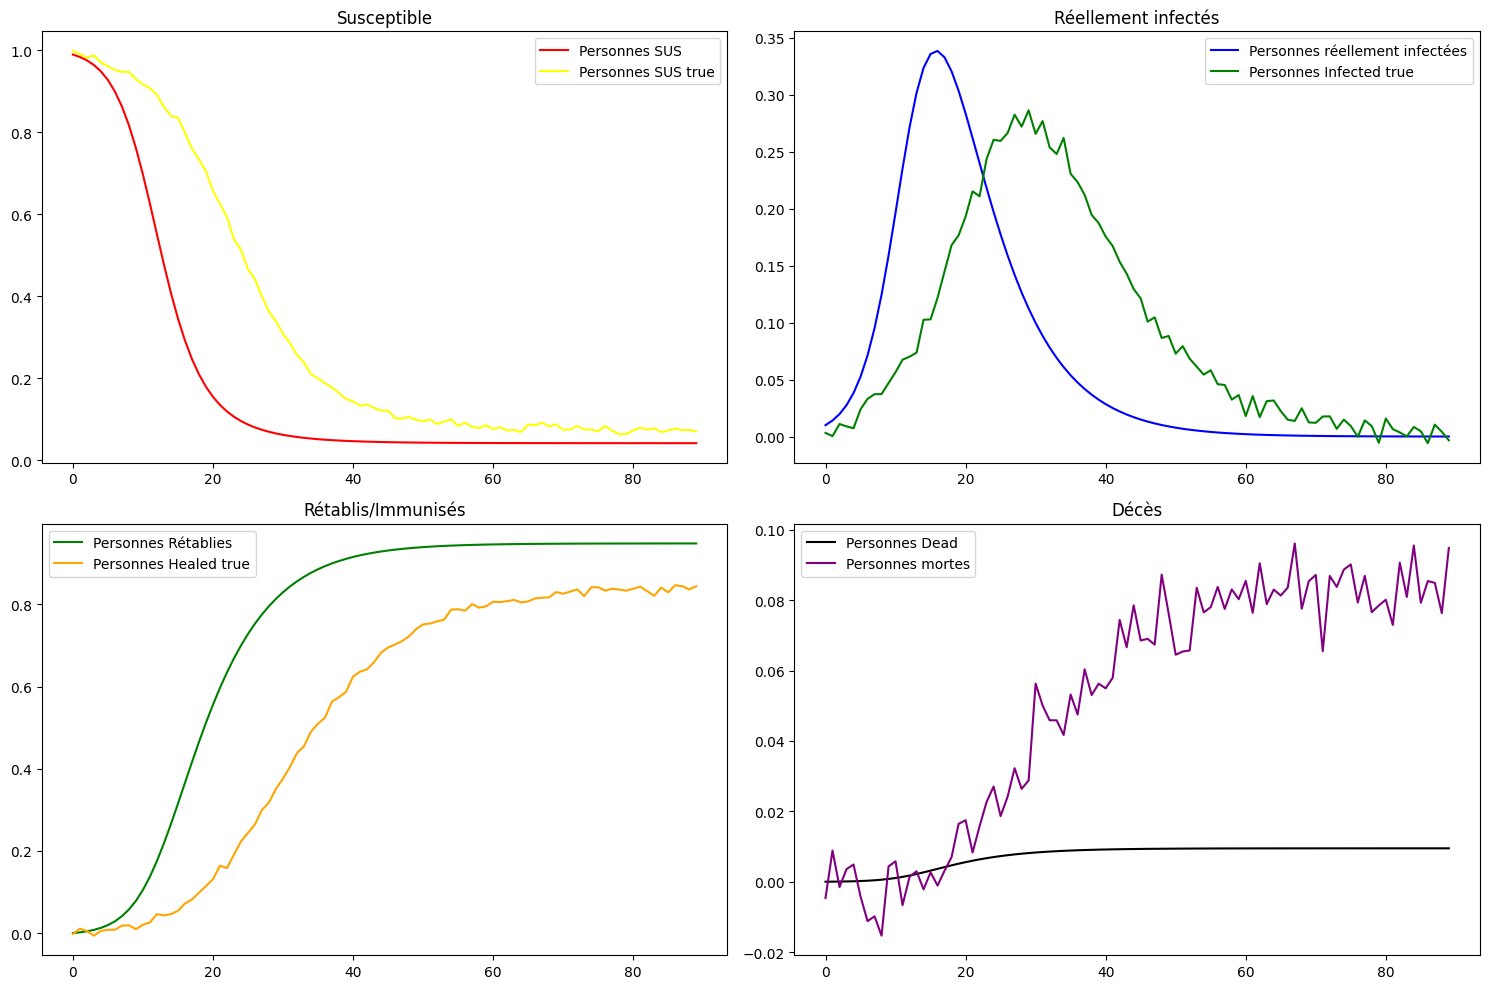

In [29]:
ploting(time, sus, inf, heal, dead,df["Jour"], df["Susceptibles"], df["Infectés"],df["Rétablis"],df["Décès"])

## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [37]:
def MSE (predict_value, true_value) :
    return np.mean((predict_value - true_value)**2)


In [39]:
# Avec les params non optimaux

total_mse = (
    MSE(sus, df['Susceptibles']) +
    MSE(inf, df['Infectés']) +
    MSE(heal, df['Rétablis']) +
    MSE(dead, df['Décès'])
)

print("Total MSE :", total_mse)

Total MSE : 0.12135295644979696


In [40]:
import numpy
from tqdm.contrib.itertools import product

def grid_search(step, number_days, ground_truth,debut_date,last_date):
    betas = numpy.linspace(0.25, 0.5, 20)
    gammas = numpy.linspace(0.08, 0.15, 20)
    micros = numpy.linspace(0.005, 0.015,20)

    # Paramètres initiaux de la population
    initial_sus = 0.99
    initial_inf = 0.01
    initial_heal = 0
    initial_dead = 0

    best_beta, best_gamma, best_micro = None, None, None
    best_mse = float("inf")

    for beta, gamma, micro in product(betas, gammas, micros):
        # Réinitialisation des valeurs initiales pour chaque itération
        sus = initial_sus
        inf = initial_inf
        heal = initial_heal
        dead = initial_dead

        # Appel de la fonction euler_sird avec les paramètres réinitialisés
        time, sus_list, inf_list, heal_list, dead_list = euler_sird(
            [beta, gamma, micro], [sus, inf, heal, dead], step, number_days
        )

        # Calcul des erreurs MSE entre les données simulées et les données réelles
        mse_sus = MSE(sus_list, ground_truth['Susceptibles'][debut_date:last_date])
        mse_inf = MSE(inf_list, ground_truth['Infectés'][debut_date:last_date])
        mse_heal = MSE(heal_list, ground_truth['Rétablis'][debut_date:last_date])
        mse_dead = MSE(dead_list, ground_truth['Décès'][debut_date:last_date])

        # Calcul de l'erreur globale
        actual_mse = mse_sus + mse_inf + mse_heal + mse_dead

        # Mise à jour des meilleurs paramètres si une meilleure combinaison est trouvée
        if actual_mse < best_mse:
            best_mse = actual_mse
            best_beta, best_gamma, best_micro = beta, gamma, micro

    return best_beta, best_gamma, best_micro, best_mse



In [46]:
best_beta, best_gamma, best_micro, best_mse = grid_search(0.01, 90, df, 0, 90)


  0%|          | 0/8000 [00:00<?, ?it/s]

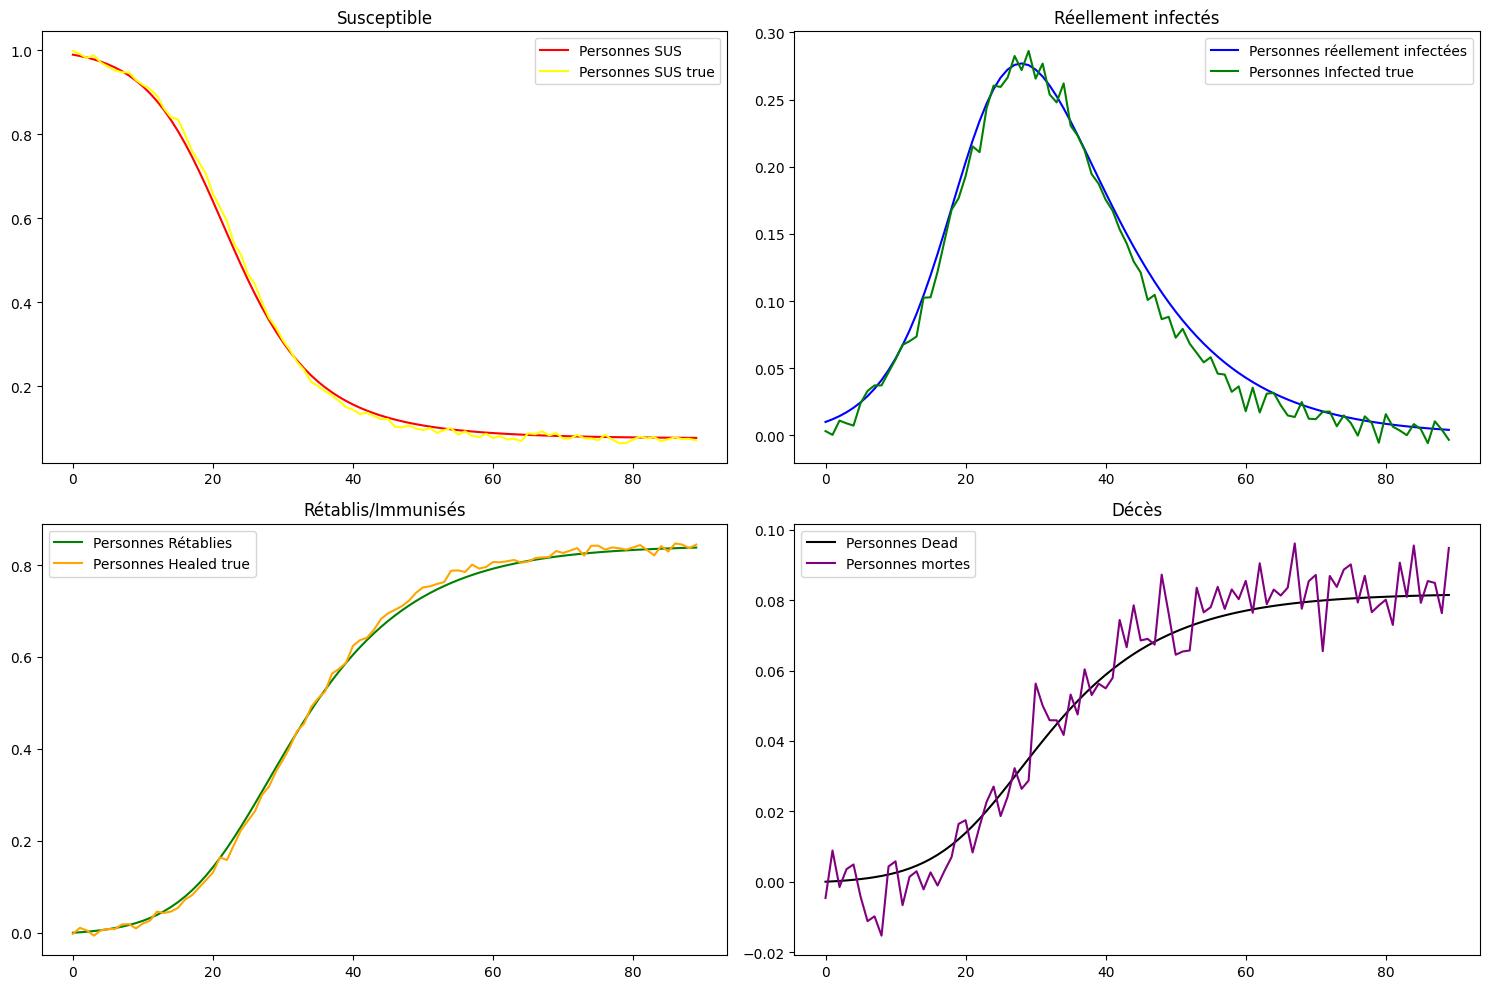

In [47]:
time, sus, inf, heal, dead = euler_sird([best_beta, best_gamma, best_micro],[0.99, 0.01, 0, 0],0.01, 90)
ploting(time, sus, inf, heal, dead,df["Jour"], df["Susceptibles"], df["Infectés"],df["Rétablis"],df["Décès"])


In [48]:
total_mse = (
    MSE(sus, df['Susceptibles']) +
    MSE(inf, df['Infectés']) +
    MSE(heal, df['Rétablis']) +
    MSE(dead, df['Décès'])
)

print("Total MSE :", total_mse)

Total MSE : 0.0003829842196496562


### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

# LE **R0**
Le R0 permet d’estimer combien de personnes seront infectés par une personne malade, par exemple si le R0 est égale à 1,2, on déduit que 10 personnes peuvent conjointement infectés jusqu’à 12 personnes.

- Quand **R₀ > 1**, cela signifie que la propagation du virus est en hausse, car chaque personne infectée en transmet le virus à plus d'une autre, entraînant ainsi une croissance exponentielle des cas.
- Quand **R₀ < 1**, cela signifie que la propagation du virus est en diminution, car chaque personne infectée en transmet le virus à moins d'une autre, entraînant une diminution progressive des cas.1.

In [49]:
#2
R0 = best_beta / (best_gamma + best_micro)
print(R0)

2.7848101265822787


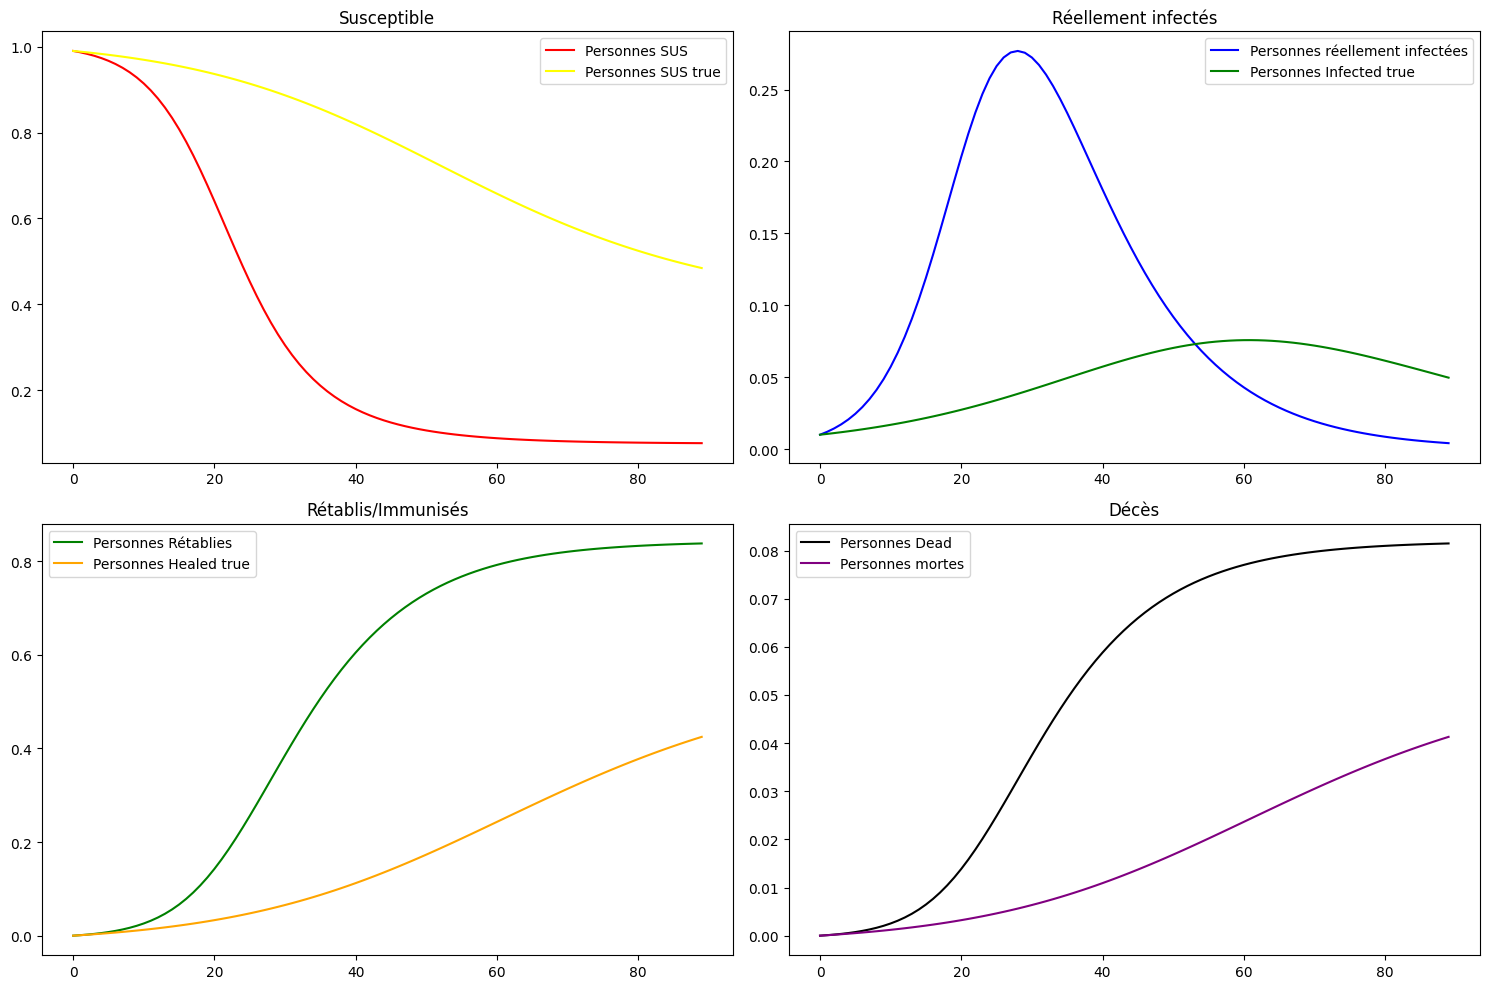

In [50]:
# New params
new_beta = 0.159473684210
new_gamma = best_gamma
new_micro = best_micro

# Calcule avec noveaux params
new_time, new_sus, new_inf, new_heal, new_dead = euler_sird([new_beta, new_gamma, new_micro],[0.99, 0.01, 0, 0],0.01, 90)

# plot avec les nouveaux params qui compare entre les données du modéle proche du réel et les données calculés avec une baisse du taux d'infection
ploting(time, sus, inf, heal, dead,new_time, new_sus, new_inf, new_heal, new_dead)



# **Diminution de beta**
Résumé et Analyse Dans cette simulation, nous avons ajusté le paramètre 𝛽 β (taux d'infection) à une valeur plus basse : 0.1594 au lieu de la valeur initiale. Les paramètres 𝛾 γ (taux de guérison) et 𝜇 μ (taux de mortalité) restent définis par les meilleures valeurs trouvées (best_gamma et best_micro).

Ensuite, nous avons recalculé l'évolution du modèle SIRD en utilisant ces nouveaux paramètres avec la méthode d'Euler. Les résultats obtenus (new_time, new_sus, new_inf, new_heal, new_dead) sont comparés aux données du modèle initial (time, sus, inf, heal, dead).

Observations Réduction du nombre d’infections

Avec un 𝛽 β plus faible, la courbe des infections montre un pic moins élevé et un ralentissement de la propagation. Cela suggère que des mesures réduisant le taux de transmission (gestes barrières, confinement, vaccination) peuvent ralentir la propagation. Augmentation du nombre de susceptibles

La population non infectée diminue moins rapidement, car la contagion est plus limitée. Impact sur les guérisons et les décès

Moins d’infections signifie mécaniquement moins de guérisons et de décès, puisque le virus circule moins. Les courbes des guérisons et des décès suivent donc une tendance plus modérée.

PARTIE 2  

Dans cette partie on calculé le R0 pour des épochs de 15 jours pour étre cohérant avec la durée d'incubation du virus

Ce code optimise les paramètres (β,γ, μ) du modèle SIRD en minimisant l'erreur quadratique moyenne (MSE) par grid search.
Il divise les données en six périodes et ajuste les paramètres pour chaque intervalle indépendamment.
À la fin, il affiche les meilleures valeurs trouvées pour chaque période ainsi que les résultats globaux.

In [ ]:
# Initialisation des listes pour stocker les résultats
betas = []
gammas = []
micros = []
mses = []

# Définition des plages de périodes
periods = [
    (0, 15),
    (16, 31),
    (32, 47),
    (48, 63),
    (64, 79),
    (80, 90)
]

# Boucle sur chaque période
for idx, (start, end) in enumerate(periods):
    # Appel de la fonction grid_search pour chaque période
    best_beta, best_gamma, best_micro, best_mse = grid_search(0.01, end - start , df, start, end)

    # Ajout des résultats dans les listes
    betas.append(best_beta)
    gammas.append(best_gamma)
    micros.append(best_micro)
    mses.append(best_mse)

    # Affichage des résultats pour chaque période
    print(f"Période {idx + 1} ({start} à {end}):")
    print(f"  Beta={best_beta:.4f}, Gamma={best_gamma:.4f}, Micro={best_micro:.4f}, MSE={best_mse:.4f}\n")

# Affichage des résultats globaux après toutes les périodes
print("\nRésultats finaux pour toutes les périodes :")
print("Betas :", betas)
print("Gammas :", gammas)
print("Micros :", micros)
print("MSEs :", mses)


  0%|          | 0/8000 [00:00<?, ?it/s]

In [ ]:

#Sur la période de 15 jours
def R0 (beta, gamma, micro) :
  R0_values = []
  for iter in range (0,len(beta)) :
    R0_values.append(beta[iter]/ (gamma[iter] + micro[iter]))
  return R0_values
R0_values = R0(betas, gammas, micros)
leng = len(R0_values)
print(leng)

def plot_R0(R0_values) :
  plt.figure(figsize=(16,8))
  plt.plot(range(len(R0_values)), R0_values, color = "red")
  plt.xlabel("Période")
  plt.ylabel("R0")
  plt.title("Evolution de R0 au cours du temps")
  plt.show()

plot_R0(R0_values)